<a href="https://colab.research.google.com/github/j14sri/Predictive-Maintenance-Dashboard/blob/main/predictive_maintenance_of_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn


df=pd.read_csv('/content/logistics_dataset_with_maintenance_required.csv')

In [ ]:
!pip install imbalanced-learn xgboost

In [ ]:
df.head(5)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,...,Good,1.0,0.0,0.171873,1.0,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,...,Fair,1.0,0.0,0.246670,1.0,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,...,Good,1.0,1.0,0.455236,1.0,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,2024-05-01,Tire Rotation,...,Good,0.0,1.0,0.060208,1.0,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,2023-11-15,Tire Rotation,...,Good,1.0,1.0,0.264929,1.0,Rainy,Urban,300.000000,6.608704,0.395193


In [ ]:
print(df.dtypes)
print(df['Route_Info'].unique())

Vehicle_ID                 int64
Make_and_Model            object
Year_of_Manufacture        int64
Vehicle_Type              object
Usage_Hours                int64
Route_Info                object
Load_Capacity            float64
Actual_Load              float64
Last_Maintenance_Date     object
Maintenance_Type          object
Maintenance_Cost         float64
Engine_Temperature       float64
Tire_Pressure            float64
Fuel_Consumption         float64
Battery_Status           float64
Vibration_Levels         float64
Oil_Quality              float64
Brake_Condition           object
Failure_History            int64
Anomalies_Detected         int64
Predictive_Score         float64
Maintenance_Required       int64
Weather_Conditions        object
Road_Conditions           object
Delivery_Times           float64
Downtime_Maintenance     float64
Impact_on_Efficiency     float64
dtype: object
['Rural' 'Urban' 'Highway']


In [ ]:
print(df['Route_Info'].unique())

[nan]


In [ ]:
df['Route_Info']=df['Route_Info'].astype(str).str.strip()
df['Route_Info']=df['Route_Info'].fillna("Unknown")
df['Route_Info']=df['Route_Info'].map({'Rural':1,'Urban':2,'Highway':3})
df.head(20)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,1,7.534549,9.004247,2023-04-09,Oil Change,...,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,1,7.671728,6.111785,2023-07-20,Tire Rotation,...,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,1,2.901159,3.006055,2023-03-17,Oil Change,...,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,2,15.893347,18.825290,2024-05-01,Tire Rotation,...,Good,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,1,60.668320,65.605463,2023-11-15,Tire Rotation,...,Good,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193
5,6,Ford F-150,2022,Van,2319,2,5.734597,4.897554,2023-07-13,Oil Change,...,Poor,1,0,0.064895,1,Clear,Rural,30.000000,4.196813,0.214606
6,7,Ford F-150,2007,Van,2440,2,44.595153,34.372183,2023-10-29,Oil Change,...,Good,1,0,0.262479,1,Clear,Rural,30.000000,6.972197,0.113777
7,8,Tesla Semi,2021,Truck,6775,2,22.528761,19.771153,2023-10-22,Oil Change,...,Fair,0,0,0.165320,0,Rainy,Urban,139.626313,0.000000,0.184382
8,9,Chevy Silverado,2021,Truck,1166,3,11.399962,8.125254,2024-03-29,Engine Overhaul,...,Fair,0,0,0.376539,0,Clear,Highway,81.486447,0.000000,0.373283
9,10,Chevy Silverado,2022,Truck,1025,1,99.134824,104.462335,2023-06-05,Oil Change,...,Fair,0,1,0.106651,1,Clear,Rural,247.354044,0.000000,0.263572


In [ ]:
df['Brake_Condition']=df['Brake_Condition'].astype(str).str.strip()
df['Brake_Condition']=df['Brake_Condition'].map({'Good':1,'Fair':2,'Poor':3})

In [ ]:
df.head(5)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,1,7.534549,9.004247,2023-04-09,Oil Change,...,1,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,1,7.671728,6.111785,2023-07-20,Tire Rotation,...,2,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,1,2.901159,3.006055,2023-03-17,Oil Change,...,1,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,2,15.893347,18.825290,2024-05-01,Tire Rotation,...,1,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,1,60.668320,65.605463,2023-11-15,Tire Rotation,...,1,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193


In [ ]:
correlation = df[['Route_Info', 'Road_Conditions']].astype('category').apply(lambda x: x.cat.codes).corr()
print(correlation)

                 Route_Info  Road_Conditions
Route_Info         1.000000        -0.007017
Road_Conditions   -0.007017         1.000000


In [ ]:
print(df['Weather_Conditions'].unique())

['Clear' 'Rainy' 'Windy' 'Snowy']


In [ ]:
df['Road_Conditions']=df['Road_Conditions'].astype(str).str.strip()
df['Road_Conditions']=df['Road_Conditions'].map({'Rural':1,'Urban':2,'Highway':3})
df['Weather_Conditions']=df['Weather_Conditions'].astype(str).str.strip()
df['Weather_Conditions']=df['Weather_Conditions'].map({'Clear':1 ,'Rainy':2, 'Windy':3 ,'Snowy':4})



In [ ]:
df.head(5)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,1,7.534549,9.004247,2023-04-09,Oil Change,...,1,1,0,0.171873,1,1,3,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,1,7.671728,6.111785,2023-07-20,Tire Rotation,...,2,1,0,0.246670,1,1,1,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,1,2.901159,3.006055,2023-03-17,Oil Change,...,1,1,1,0.455236,1,1,3,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,2,15.893347,18.825290,2024-05-01,Tire Rotation,...,1,0,1,0.060208,1,1,3,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,1,60.668320,65.605463,2023-11-15,Tire Rotation,...,1,1,1,0.264929,1,2,2,300.000000,6.608704,0.395193


In [ ]:
print(df['Vehicle_Type'].unique())
print(df['Make_and_Model'].unique())
print(df.dtypes)

['Truck' 'Van']
['Ford F-150' 'Volvo FH' 'Chevy Silverado' 'Tesla Semi']
Vehicle_ID                 int64
Make_and_Model            object
Year_of_Manufacture        int64
Vehicle_Type              object
Usage_Hours                int64
Route_Info                 int64
Load_Capacity            float64
Actual_Load              float64
Last_Maintenance_Date     object
Maintenance_Type          object
Maintenance_Cost         float64
Engine_Temperature       float64
Tire_Pressure            float64
Fuel_Consumption         float64
Battery_Status           float64
Vibration_Levels         float64
Oil_Quality              float64
Brake_Condition            int64
Failure_History            int64
Anomalies_Detected         int64
Predictive_Score         float64
Maintenance_Required       int64
Weather_Conditions         int64
Road_Conditions            int64
Delivery_Times           float64
Downtime_Maintenance     float64
Impact_on_Efficiency     float64
dtype: object


In [ ]:
print(df.isnull().sum())

Vehicle_ID               0
Make_and_Model           0
Year_of_Manufacture      0
Vehicle_Type             0
Usage_Hours              0
Route_Info               0
Load_Capacity            0
Actual_Load              0
Last_Maintenance_Date    0
Maintenance_Type         0
Maintenance_Cost         0
Engine_Temperature       0
Tire_Pressure            0
Fuel_Consumption         0
Battery_Status           0
Vibration_Levels         0
Oil_Quality              0
Brake_Condition          0
Failure_History          0
Anomalies_Detected       0
Predictive_Score         0
Maintenance_Required     0
Weather_Conditions       0
Road_Conditions          0
Delivery_Times           0
Downtime_Maintenance     0
Impact_on_Efficiency     0
dtype: int64


In [ ]:
df['Last_Maintenance_Date']=pd.to_datetime(df['Last_Maintenance_Date'])
df['Days_Since_Last_Maintenance']=(pd.to_datetime("today"))-df['Last_Maintenance_Date']
df['Maintenance_Month']=df['Last_Maintenance_Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
df.drop(columns=['Last_Maintenance_Date'],inplace=True)
print (df)


       Vehicle_ID   Make_and_Model  Year_of_Manufacture Vehicle_Type  \
0               1       Ford F-150                 2022        Truck   
1               2         Volvo FH                 2015          Van   
2               3  Chevy Silverado                 2022          Van   
3               4  Chevy Silverado                 2011        Truck   
4               5       Ford F-150                 2014          Van   
...           ...              ...                  ...          ...   
91995       91996  Chevy Silverado                 2022          Van   
91996       91997       Ford F-150                 2006        Truck   
91997       91998       Tesla Semi                 2020          Van   
91998       91999       Tesla Semi                 2022        Truck   
91999       92000       Ford F-150                 2020          Van   

       Usage_Hours  Route_Info  Load_Capacity  Actual_Load Maintenance_Type  \
0              530           1       7.534549     9.0042

In [ ]:
df.head(10)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Maintenance_Type,Maintenance_Cost,...,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency,Days_Since_Last_Maintenance,Maintenance_Month
0,1,Ford F-150,2022,Truck,530,1,7.534549,9.004247,Oil Change,110.165442,...,0,0.171873,1,1,3,30.000000,0.093585,0.150063,723 days 08:12:48.243270,April
1,2,Volvo FH,2015,Van,10679,1,7.671728,6.111785,Tire Rotation,265.898087,...,0,0.246670,1,1,1,30.000000,3.361201,0.343017,621 days 08:12:48.243270,July
2,3,Chevy Silverado,2022,Van,4181,1,2.901159,3.006055,Oil Change,412.483470,...,1,0.455236,1,1,3,48.627823,1.365300,0.100000,746 days 08:12:48.243270,March
3,4,Chevy Silverado,2011,Truck,2974,2,15.893347,18.825290,Tire Rotation,444.110857,...,1,0.060208,1,1,3,30.000000,0.000000,0.135749,335 days 08:12:48.243270,May
4,5,Ford F-150,2014,Van,2539,1,60.668320,65.605463,Tire Rotation,478.841922,...,1,0.264929,1,2,2,300.000000,6.608704,0.395193,503 days 08:12:48.243270,November
5,6,Ford F-150,2022,Van,2319,2,5.734597,4.897554,Oil Change,352.838841,...,0,0.064895,1,1,1,30.000000,4.196813,0.214606,628 days 08:12:48.243270,July
6,7,Ford F-150,2007,Van,2440,2,44.595153,34.372183,Oil Change,413.158405,...,0,0.262479,1,1,1,30.000000,6.972197,0.113777,520 days 08:12:48.243270,October
7,8,Tesla Semi,2021,Truck,6775,2,22.528761,19.771153,Oil Change,264.598494,...,0,0.165320,0,2,2,139.626313,0.000000,0.184382,527 days 08:12:48.243270,October
8,9,Chevy Silverado,2021,Truck,1166,3,11.399962,8.125254,Engine Overhaul,3507.910566,...,0,0.376539,0,1,3,81.486447,0.000000,0.373283,368 days 08:12:48.243270,March
9,10,Chevy Silverado,2022,Truck,1025,1,99.134824,104.462335,Oil Change,107.310166,...,1,0.106651,1,1,1,247.354044,0.000000,0.263572,666 days 08:12:48.243270,June


In [ ]:
print(df.dtypes)

Vehicle_ID                               int64
Make_and_Model                          object
Year_of_Manufacture                      int64
Vehicle_Type                            object
Usage_Hours                              int64
Route_Info                               int64
Load_Capacity                          float64
Actual_Load                            float64
Maintenance_Type                        object
Maintenance_Cost                       float64
Engine_Temperature                     float64
Tire_Pressure                          float64
Fuel_Consumption                       float64
Battery_Status                         float64
Vibration_Levels                       float64
Oil_Quality                            float64
Brake_Condition                          int64
Failure_History                          int64
Anomalies_Detected                       int64
Predictive_Score                       float64
Maintenance_Required                     int64
Weather_Condi

In [ ]:
print(df['Maintenance_Type'].unique())
df=pd.get_dummies(df,columns=['Maintenance_Type'],prefix='maint')
df.head(5)

['Oil Change' 'Tire Rotation' 'Engine Overhaul']


,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Maintenance_Cost,Engine_Temperature,...,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency,Days_Since_Last_Maintenance,Maintenance_Month,maint_Engine Overhaul,maint_Oil Change,maint_Tire Rotation
0,1,Ford F-150,2022,Truck,530,1,7.534549,9.004247,110.165442,120.0,...,1,3,30.000000,0.093585,0.150063,743 days 04:59:44.504043,April,False,True,False
1,2,Volvo FH,2015,Van,10679,1,7.671728,6.111785,265.898087,120.0,...,1,1,30.000000,3.361201,0.343017,641 days 04:59:44.504043,July,False,False,True
2,3,Chevy Silverado,2022,Van,4181,1,2.901159,3.006055,412.483470,120.0,...,1,3,48.627823,1.365300,0.100000,766 days 04:59:44.504043,March,False,True,False
3,4,Chevy Silverado,2011,Truck,2974,2,15.893347,18.825290,444.110857,120.0,...,1,3,30.000000,0.000000,0.135749,355 days 04:59:44.504043,May,False,False,True
4,5,Ford F-150,2014,Van,2539,1,60.668320,65.605463,478.841922,120.0,...,2,2,300.000000,6.608704,0.395193,523 days 04:59:44.504043,November,False,False,True


In [ ]:
print(df.dtypes)

Vehicle_ID                               int64
Make_and_Model                          object
Year_of_Manufacture                      int64
Vehicle_Type                            object
Usage_Hours                              int64
Route_Info                               int64
Load_Capacity                          float64
Actual_Load                            float64
Maintenance_Cost                       float64
Engine_Temperature                     float64
Tire_Pressure                          float64
Fuel_Consumption                       float64
Battery_Status                         float64
Vibration_Levels                       float64
Oil_Quality                            float64
Brake_Condition                          int64
Failure_History                          int64
Anomalies_Detected                       int64
Predictive_Score                       float64
Maintenance_Required                     int64
Weather_Conditions                       int64
Road_Conditio

In [ ]:
print(df.columns)

Index(['Vehicle_ID', 'Make_and_Model', 'Year_of_Manufacture', 'Vehicle_Type',
       'Usage_Hours', 'Route_Info', 'Load_Capacity', 'Actual_Load',
       'Maintenance_Cost', 'Engine_Temperature', 'Tire_Pressure',
       'Fuel_Consumption', 'Battery_Status', 'Vibration_Levels', 'Oil_Quality',
       'Brake_Condition', 'Failure_History', 'Anomalies_Detected',
       'Predictive_Score', 'Maintenance_Required', 'Weather_Conditions',
       'Road_Conditions', 'Delivery_Times', 'Downtime_Maintenance',
       'Impact_on_Efficiency', 'Days_Since_Last_Maintenance',
       'Maintenance_Month', 'maint_Engine Overhaul', 'maint_Oil Change',
       'maint_Tire Rotation'],
      dtype='object')


In [ ]:
df['Make_and_Model']=df['Make_and_Model'].str.strip()
df['Vehicle_Type']=df['Vehicle_Type'].str.strip()
df.drop(columns=[ 'Make_and_Model'],axis=1,inplace=True)
df.drop(columns=[ 'Vehicle_Type'],axis=1,inplace=True)
df.head(10)

,Vehicle_ID,Year_of_Manufacture,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,...,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency,Days_Since_Last_Maintenance,Maintenance_Month,maint_Engine Overhaul,maint_Oil Change,maint_Tire Rotation
0,1,2022,530,1,7.534549,9.004247,110.165442,120.0,20.0,5.000000,...,1,3,30.000000,0.093585,0.150063,743 days 04:59:44.504043,April,False,True,False
1,2,2015,10679,1,7.671728,6.111785,265.898087,120.0,20.0,5.000000,...,1,1,30.000000,3.361201,0.343017,641 days 04:59:44.504043,July,False,False,True
2,3,2022,4181,1,2.901159,3.006055,412.483470,120.0,55.0,13.006892,...,1,3,48.627823,1.365300,0.100000,766 days 04:59:44.504043,March,False,True,False
3,4,2011,2974,2,15.893347,18.825290,444.110857,120.0,20.0,5.000000,...,1,3,30.000000,0.000000,0.135749,355 days 04:59:44.504043,May,False,False,True
4,5,2014,2539,1,60.668320,65.605463,478.841922,120.0,55.0,5.000000,...,2,2,300.000000,6.608704,0.395193,523 days 04:59:44.504043,November,False,False,True
5,6,2022,2319,2,5.734597,4.897554,352.838841,120.0,20.0,20.000000,...,1,1,30.000000,4.196813,0.214606,648 days 04:59:44.504043,July,False,True,False
6,7,2007,2440,2,44.595153,34.372183,413.158405,120.0,55.0,6.749432,...,1,1,30.000000,6.972197,0.113777,540 days 04:59:44.504043,October,False,True,False
7,8,2021,6775,2,22.528761,19.771153,264.598494,120.0,55.0,5.000000,...,2,2,139.626313,0.000000,0.184382,547 days 04:59:44.504043,October,False,True,False
8,9,2021,1166,3,11.399962,8.125254,3507.910566,120.0,20.0,13.065725,...,1,3,81.486447,0.000000,0.373283,388 days 04:59:44.504043,March,True,False,False
9,10,2022,1025,1,99.134824,104.462335,107.310166,120.0,55.0,20.000000,...,1,1,247.354044,0.000000,0.263572,686 days 04:59:44.504043,June,False,True,False


In [ ]:
import pandas as pd

# Ensure column is string type and strip extra spaces
df['Maintenance_Month'] = df['Maintenance_Month'].astype(str).str.strip()

# Convert month names to numbers (handles full & short names)
df['Month'] = pd.to_datetime(df['Maintenance_Month'], format='%B', errors='coerce').dt.month

# Drop the original column if needed
df.drop(columns=['Maintenance_Month'], inplace=True)

# Check for any NaN values (if conversion failed for some rows)
print(df['Month'].isna().sum())

df.head(10)




0


,Vehicle_ID,Year_of_Manufacture,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,...,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency,Days_Since_Last_Maintenance,maint_Engine Overhaul,maint_Oil Change,maint_Tire Rotation,Month
0,1,2022,530,1,7.534549,9.004247,110.165442,120.0,20.0,5.000000,...,1,3,30.000000,0.093585,0.150063,743 days 04:59:44.504043,False,True,False,4
1,2,2015,10679,1,7.671728,6.111785,265.898087,120.0,20.0,5.000000,...,1,1,30.000000,3.361201,0.343017,641 days 04:59:44.504043,False,False,True,7
2,3,2022,4181,1,2.901159,3.006055,412.483470,120.0,55.0,13.006892,...,1,3,48.627823,1.365300,0.100000,766 days 04:59:44.504043,False,True,False,3
3,4,2011,2974,2,15.893347,18.825290,444.110857,120.0,20.0,5.000000,...,1,3,30.000000,0.000000,0.135749,355 days 04:59:44.504043,False,False,True,5
4,5,2014,2539,1,60.668320,65.605463,478.841922,120.0,55.0,5.000000,...,2,2,300.000000,6.608704,0.395193,523 days 04:59:44.504043,False,False,True,11
5,6,2022,2319,2,5.734597,4.897554,352.838841,120.0,20.0,20.000000,...,1,1,30.000000,4.196813,0.214606,648 days 04:59:44.504043,False,True,False,7
6,7,2007,2440,2,44.595153,34.372183,413.158405,120.0,55.0,6.749432,...,1,1,30.000000,6.972197,0.113777,540 days 04:59:44.504043,False,True,False,10
7,8,2021,6775,2,22.528761,19.771153,264.598494,120.0,55.0,5.000000,...,2,2,139.626313,0.000000,0.184382,547 days 04:59:44.504043,False,True,False,10
8,9,2021,1166,3,11.399962,8.125254,3507.910566,120.0,20.0,13.065725,...,1,3,81.486447,0.000000,0.373283,388 days 04:59:44.504043,True,False,False,3
9,10,2022,1025,1,99.134824,104.462335,107.310166,120.0,55.0,20.000000,...,1,1,247.354044,0.000000,0.263572,686 days 04:59:44.504043,False,True,False,6


In [ ]:
print(df.dtypes)

Vehicle_ID                               int64
Year_of_Manufacture                      int64
Usage_Hours                              int64
Route_Info                               int64
Load_Capacity                          float64
Actual_Load                            float64
Maintenance_Cost                       float64
Engine_Temperature                     float64
Tire_Pressure                          float64
Fuel_Consumption                       float64
Battery_Status                         float64
Vibration_Levels                       float64
Oil_Quality                            float64
Brake_Condition                          int64
Failure_History                          int64
Anomalies_Detected                       int64
Predictive_Score                       float64
Maintenance_Required                     int64
Weather_Conditions                       int64
Road_Conditions                          int64
Delivery_Times                         float64
Downtime_Main

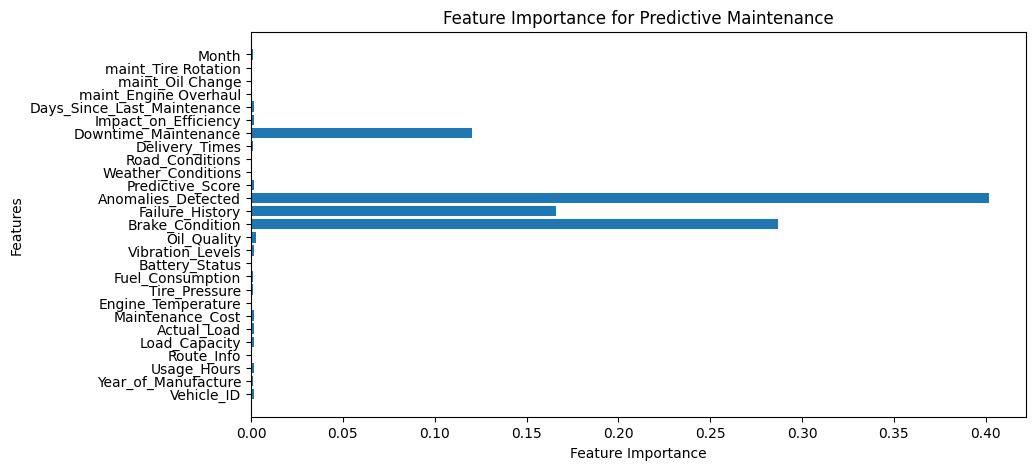

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=df.drop(columns=['Maintenance_Required'])
X['Days_Since_Last_Maintenance']=X['Days_Since_Last_Maintenance'].dt.days
y=df['Maintenance_Required']
model=RandomForestClassifier()
model.fit(X,y)
feature_importance=model.feature_importances_
plt.figure(figsize=(10, 5))  # Set plot size
plt.barh(X.columns, feature_importance)  # Horizontal bar plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Predictive Maintenance")
plt.show()

In [ ]:
print(df['Maintenance_Required'].isnull().sum())


1


In [ ]:
df = df.dropna(subset=['Maintenance_Required'])


In [ ]:
leakage_features = ['Anomalies_Detected', 'Failure_History', 'Downtime_Maintenance']
X = X.drop(columns=leakage_features)


In [ ]:
# Correlation check
df.corr()['Maintenance_Required'].sort_values(ascending=False)


,Maintenance_Required
Maintenance_Required,1.000000
Anomalies_Detected,0.500278
Failure_History,0.449440
Brake_Condition,0.323820
Downtime_Maintenance,0.273380
Impact_on_Efficiency,0.012893
Road_Conditions,0.009574
Weather_Conditions,0.008321
Month,0.007992
Vehicle_ID,0.007636


Confusion Matrix:
[[    7  4304]
 [    9 14080]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.00      0.00      4311
           1       0.77      1.00      0.87     14089

    accuracy                           0.77     18400
   macro avg       0.60      0.50      0.44     18400
weighted avg       0.69      0.77      0.66     18400


Accuracy Score: 0.77


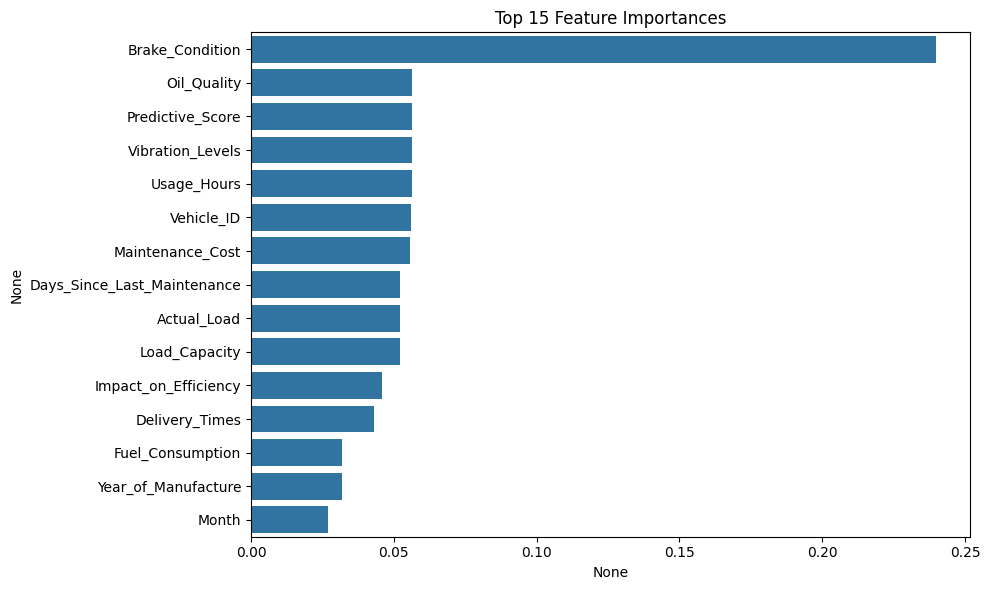

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a RandomForestClassifier with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 2))
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Recreate the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Output the results
print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation accuracy scores: [0.53266304 0.76798913 0.76777174 0.76798913 0.76798913]
Mean accuracy: 0.7208804347826087
Standard deviation: 0.0941087333152475


In [ ]:
correlation = df.corr(numeric_only=True)['Maintenance_Required'].sort_values(ascending=False)
print(correlation)


Maintenance_Required     1.000000
Anomalies_Detected       0.500278
Failure_History          0.449440
Brake_Condition          0.323820
Downtime_Maintenance     0.273380
Impact_on_Efficiency     0.012893
Road_Conditions          0.009574
Weather_Conditions       0.008321
Month                    0.007992
Vehicle_ID               0.007636
Tire_Pressure            0.004451
Delivery_Times           0.004064
Fuel_Consumption         0.002480
maint_Oil Change         0.002005
maint_Tire Rotation      0.000491
Battery_Status           0.000488
Route_Info               0.000294
Actual_Load              0.000143
Load_Capacity           -0.000160
Maintenance_Cost        -0.000911
Usage_Hours             -0.001400
Predictive_Score        -0.002952
maint_Engine Overhaul   -0.003052
Oil_Quality             -0.005709
Year_of_Manufacture     -0.007329
Vibration_Levels        -0.011237
Engine_Temperature            NaN
Name: Maintenance_Required, dtype: float64


In [ ]:
import pickle

# Replace 'model' with your actual trained model variable name
with open('/content/maintenance2_predicter.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
!ls -lh /content/maintenance2_predicter.pkl


-rw-r--r-- 1 root root 169M Apr 21 02:51 /content/maintenance2_predicter.pkl


In [ ]:
from google.colab import files
files.download('/content/maintenance2_predicter.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the model
with open("maintenance3_predicter.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the feature column names used for training
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


In [ ]:
from google.colab import files

# Download the model and feature columns
files.download('maintenance3_predicter.pkl')
files.download('feature_columns.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Load the feature columns
with open('feature_columns.pkl', 'rb') as f:
    feature_columns = pickle.load(f)

print(feature_columns)  # Check what columns are expected by the model


['Vehicle_ID', 'Year_of_Manufacture', 'Usage_Hours', 'Route_Info', 'Load_Capacity', 'Actual_Load', 'Maintenance_Cost', 'Engine_Temperature', 'Tire_Pressure', 'Fuel_Consumption', 'Battery_Status', 'Vibration_Levels', 'Oil_Quality', 'Brake_Condition', 'Predictive_Score', 'Weather_Conditions', 'Road_Conditions', 'Delivery_Times', 'Impact_on_Efficiency', 'Days_Since_Last_Maintenance', 'maint_Engine Overhaul', 'maint_Oil Change', 'maint_Tire Rotation', 'Month']
